In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/content/drive/My Drive/Neural/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [14]:
last_layer = pre_trained_model.get_layer('mixed7')
print ('last layer output shape:'), last_layer.output_shape
last_output = last_layer.output

last layer output shape:


In [15]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import os

In [0]:
base_dir = '/content/drive/My Drive/Neural/Leaf'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training apple_scab pictures
train_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')

# Directory with our training apple_healthy pictures
train_healthy_dir = os.path.join(train_dir, 'Apple___healthy')

# Directory with our validation apple_scab pictures
validation_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')

# Directory with our validation apple_healthy pictures
validation_healthy_dir = os.path.join(validation_dir, 'Apple___healthy')

In [0]:
train_scab_fnames = os.listdir(train_scab_dir)
train_healthy_fnames = os.listdir(train_healthy_dir)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [21]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 1455 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=291,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=73,
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
73/73 [==============================] - 4s 55ms/step - loss: 0.4178 - acc: 0.8767
 - 27s - loss: 0.3341 - acc: 0.8639 - val_loss: 0.4178 - val_acc: 0.8767
Epoch 2/2
73/73 [==============================] - 3s 42ms/step - loss: 1.6181 - acc: 0.7808
 - 24s - loss: 0.2486 - acc: 0.9196 - val_loss: 1.6181 - val_acc: 0.7808


In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=291,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=73,
      verbose=2)

Epoch 1/50
73/73 [==============================] - 4s 62ms/step - loss: 1.6825 - acc: 0.7945
 - 27s - loss: 0.2056 - acc: 0.9326 - val_loss: 1.6825 - val_acc: 0.7945
Epoch 2/50
73/73 [==============================] - 3s 42ms/step - loss: 1.5670 - acc: 0.8082
 - 24s - loss: 0.1910 - acc: 0.9320 - val_loss: 1.5670 - val_acc: 0.8082
Epoch 3/50
73/73 [==============================] - 3s 44ms/step - loss: 1.4857 - acc: 0.8164
 - 24s - loss: 0.1509 - acc: 0.9491 - val_loss: 1.4857 - val_acc: 0.8164
Epoch 4/50
73/73 [==============================] - 3s 42ms/step - loss: 1.4185 - acc: 0.8247
 - 24s - loss: 0.1624 - acc: 0.9416 - val_loss: 1.4185 - val_acc: 0.8247
Epoch 5/50
73/73 [==============================] - 3s 42ms/step - loss: 1.3867 - acc: 0.8192
 - 24s - loss: 0.1596 - acc: 0.9354 - val_loss: 1.3867 - val_acc: 0.8192
Epoch 6/50
73/73 [==============================] - 3s 42ms/step - loss: 1.3976 - acc: 0.8192
 - 24s - loss: 0.1876 - acc: 0.9381 - val_loss: 1.3976 - val_acc: 0.819

Text(0.5, 1.0, 'Training and validation loss')

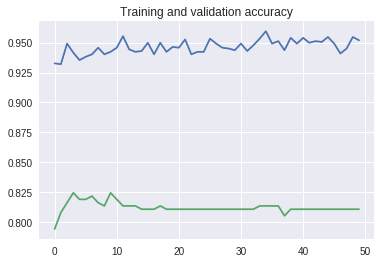

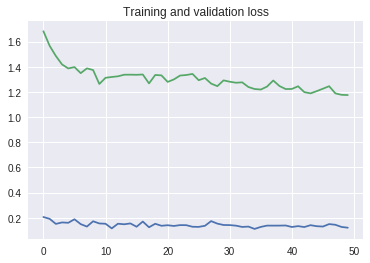

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')